In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

In [2]:
url = 'https://raw.githubusercontent.com/ryanrodr/ml-heart-disease/main/dados/heart_statlog_cleveland_hungary_final.csv'

df = pd.read_csv(url)

In [3]:
df.shape

(1190, 12)

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
tb_frequencia_sexo = pd.crosstab(index=df['sex'], columns=df['target'])\
                .rename(columns={0: 'Normal', 1: 'Doença'})\
                    .rename_axis('Sexo')\
                        .rename(index={0: 'Feminino', 1: 'Masculino'})

tb_frequencia_sexo

target,Normal,Doença
Sexo,,
Feminino,211,70
Masculino,350,559


In [6]:
tb_frequencia_sexo = tb_frequencia_sexo.reset_index()\
                                        .melt(id_vars='Sexo',
                                                value_vars=['Normal', 'Doença'],
                                                var_name='Condição',
                                                value_name='Frequência')
tb_frequencia_sexo

,Sexo,Condição,Frequência
0,Feminino,Normal,211
1,Masculino,Normal,350
2,Feminino,Doença,70
3,Masculino,Doença,559


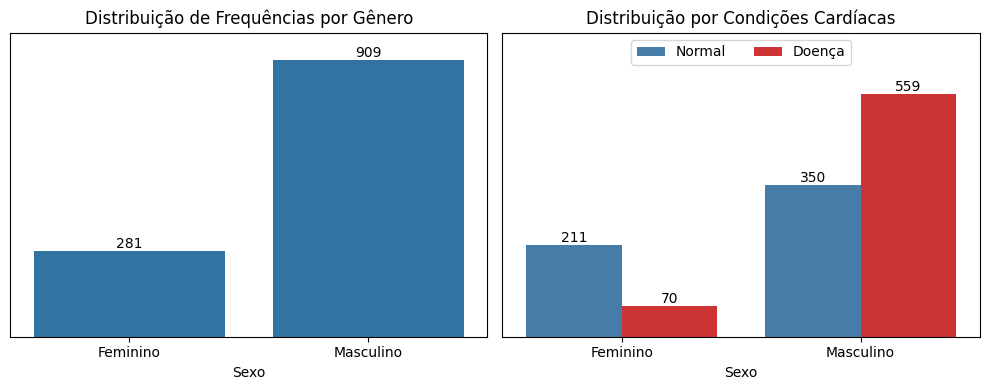

In [7]:
# Definir a paleta personalizada
custom_palette = {
    'Normal': sns.color_palette("Set1")[1],  # Azul
    'Doença': sns.color_palette("Set1")[0]   # Vermelho
}

# Definir o tamanho da figura (em polegadas)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 linha, 2 colunas

# Primeiro gráfico - Distribuição de Frequências por Gênero
ax1 = axes[0]
sns.countplot(x='sex', data=df, ax=ax1, color='C0')
ax1.set_title('Distribuição de Frequências por Gênero')
ax1.set_ylim(0, 1000)

for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_xlabel("Sexo")
ax1.set_facecolor('none')
ax1.grid(False)
ax1.set_yticks([])
ax1.set_ylabel("")

# Configurar rótulos do eixo x
sex_labels = {0: 'Feminino', 1: 'Masculino'}
ax1.set_xticklabels([sex_labels[x] for x in sorted(df['sex'].unique())])

# Segundo gráfico - Distribuição por Condições Cardíacas
ax2 = axes[1]
sns.barplot(data=tb_frequencia_sexo, x='Sexo', y='Frequência', hue='Condição', palette=custom_palette, ax=ax2)
ax2.set_title('Distribuição por Condições Cardíacas')
ax2.set_ylim(0, 700)

# Adicionar rótulos de dados
for container in ax2.containers:
    ax2.bar_label(container)

ax2.set_facecolor('none')
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylabel("")

# Ajustar a legenda para que ela fique centralizada abaixo do gráfico
legenda = ax2.legend(loc='upper center', ncol=2)
legenda.get_frame().set_facecolor('none')

plt.tight_layout()

# Salvar o gráfico na localização especificada com resolução ajustada (dpi)
output_path = "/home/ryanr/Documentos/ml-heart-disease/imagens/grafico1.png"
plt.savefig(output_path, dpi=300)  # Ajuste o dpi conforme necessário

plt.show()

In [8]:
df.head(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


- Regra de Sturges para calcular o número de intervalos

$$k = 1 + \frac {10}{3}\log_{10}n$$

In [9]:
n = df.shape[0]

k = 1 + (10/3) * np.log10(n)

k = int(k.round(0))

k

11

In [10]:
df['ClassesIdade'] = pd.cut(df['age'], bins=k)

frequencia = df['ClassesIdade'].value_counts()
frequencia_relativa = df['ClassesIdade'].value_counts(normalize=True) * 100

tb_frequencia = pd.DataFrame({'Frequência': frequencia, 'Frequência Relativa (%)': frequencia_relativa})
tb_frequencia.rename_axis('ClassesIdade', inplace=True)
tb_frequencia.sort_values(by='ClassesIdade', ascending=True, inplace=True)
tb_frequencia = tb_frequencia.reset_index(drop=False)

tb_frequencia['Frequência Acumulada'] = tb_frequencia['Frequência'].cumsum()
tb_frequencia['Frequência Relativa Acumulada (%)'] = tb_frequencia['Frequência Acumulada'] / tb_frequencia['Frequência'].sum() * 100

tb_frequencia

,ClassesIdade,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,"(27.951, 32.455]",13,1.092437,13,1.092437
1,"(32.455, 36.909]",31,2.605042,44,3.697479
2,"(36.909, 41.364]",97,8.151261,141,11.848739
3,"(41.364, 45.818]",111,9.327731,252,21.176471
4,"(45.818, 50.273]",151,12.689076,403,33.865546
5,"(50.273, 54.727]",201,16.890756,604,50.756303
6,"(54.727, 59.182]",249,20.924370,853,71.680672
7,"(59.182, 63.636]",165,13.865546,1018,85.546218
8,"(63.636, 68.091]",115,9.663866,1133,95.210084
9,"(68.091, 72.545]",39,3.277311,1172,98.487395


In [11]:
tb_target = pd.crosstab(index=df['ClassesIdade'], columns=df['target'])
tb_target['Frequência'] = tb_target.sum(axis=1)
tb_target.rename(columns={0: 'Normal', 1: 'Doença'}, inplace=True)
tb_target

target,Normal,Doença,Frequência
ClassesIdade,,,
"(27.951, 32.455]",10,3,13
"(32.455, 36.909]",20,11,31
"(36.909, 41.364]",66,31,97
"(41.364, 45.818]",82,29,111
"(45.818, 50.273]",74,77,151
"(50.273, 54.727]",115,86,201
"(54.727, 59.182]",90,159,249
"(59.182, 63.636]",41,124,165
"(63.636, 68.091]",43,72,115


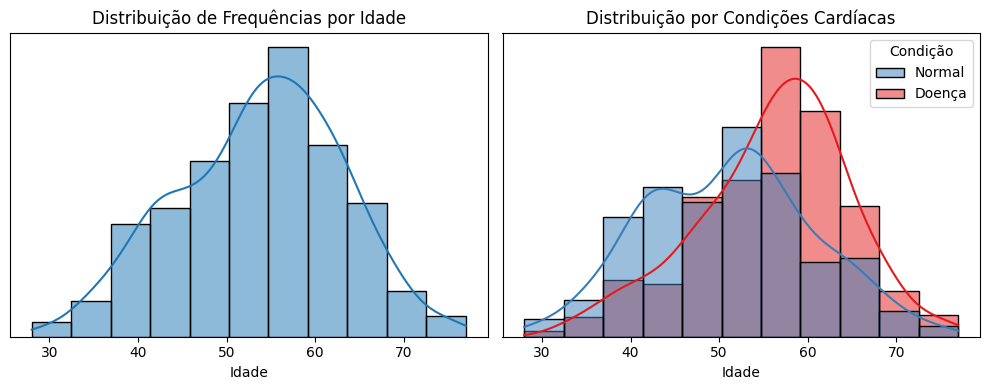

In [12]:
df['Condição'] = df['target'].map({0: 'Normal', 1: 'Doença'})

# Definir o tamanho da figura (em polegadas)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 linha, 2 colunas

# Primeiro gráfico - Distribuição de Frequências por Idade
ax1 = axes[0]
sns.histplot(data=df, x='age', kde=True, bins=k, ax=ax1)
ax1.set_title('Distribuição de Frequências por Idade')
ax1.set_xlabel('Idade')
ax1.set_facecolor('none')
ax1.grid(False)
ax1.set_yticks([])
ax1.set_ylabel("")

# Segundo gráfico - Distribuição por Condições Cardíacas
ax2 = axes[1]
sns.histplot(data=df, x='age', kde=True, bins=k, hue='Condição', palette=custom_palette, ax=ax2)
ax2.set_title('Distribuição por Condições Cardíacas')
ax2.set_xlabel('Idade')
ax2.set_facecolor('none')
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylabel("")

plt.tight_layout()

# Salvar o gráfico na localização especificada com resolução ajustada (dpi)
output_path = "/home/ryanr/Documentos/ml-heart-disease/imagens/grafico2.png"
plt.savefig(output_path, dpi=300)  # Ajuste o dpi conforme necessário

plt.show()

In [13]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,ClassesIdade,Condição
0,40,1,2,140,289,0,0,172,0,0.0,1,0,"(36.909, 41.364]",Normal
1,49,0,3,160,180,0,0,156,0,1.0,2,1,"(45.818, 50.273]",Doença
2,37,1,2,130,283,0,1,98,0,0.0,1,0,"(36.909, 41.364]",Normal
3,48,0,4,138,214,0,0,108,1,1.5,2,1,"(45.818, 50.273]",Doença
4,54,1,3,150,195,0,0,122,0,0.0,1,0,"(50.273, 54.727]",Normal


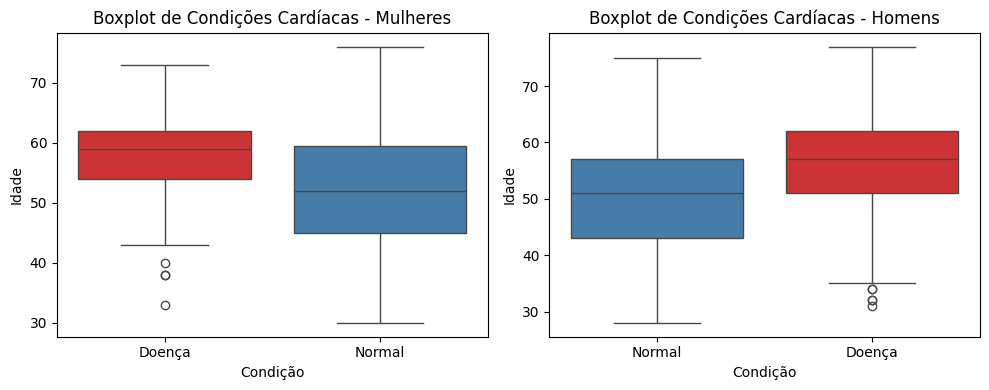

In [14]:
# Definir o tamanho da figura (em polegadas)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 linha, 2 colunas

# Primeiro gráfico - Boxplot de Condições Cardíacas - Mulheres
ax1 = axes[0]
sns.boxplot(x='Condição', y='age', data=df[df['sex'] == 0], palette=custom_palette, ax=ax1)
ax1.set_title('Boxplot de Condições Cardíacas - Mulheres')
ax1.set_xlabel("Condição")
ax1.set_ylabel("Idade")
ax1.set_facecolor('none')
ax1.grid(False)

# Segundo gráfico - Boxplot de Condições Cardíacas - Homens
ax2 = axes[1]
sns.boxplot(x='Condição', y='age', data=df[df['sex'] == 1], palette=custom_palette, ax=ax2)
ax2.set_title('Boxplot de Condições Cardíacas - Homens')
ax2.set_xlabel("Condição")
ax2.set_ylabel("Idade")
ax2.set_facecolor('none')
ax2.grid(False)

plt.tight_layout()

# Salvar o gráfico na localização especificada com resolução ajustada (dpi)
output_path = "/home/ryanr/Documentos/ml-heart-disease/imagens/grafico3.png"
plt.savefig(output_path, dpi=300)  # Ajuste o dpi conforme necessário

plt.show()